Лекция 5. **III Инженерия данных.** Источники данных, Базы данных. Консистентность данных. Обучающие данные. Конструирование признаков.

Лекция 6. **IV. Разработка модели.** Работа с моделями. Итеративный выбор модели. Целевые функции.

Лекция 7. Практика

#  Лекция 5. Инженерия данных

Данные в машинном обучении играют настолько же важную роль, как и модель. Зачастую очистка данных, увеличение числа примеров, или правильная инженерия данных дадут прирост больший, чем выбор более продвинутой модели.

Больше не всегда значит лучше! 

## Качество данных:

Метрики качества данных
    
    Полнота Completeness
    
    Точность Accuracy
    
    Согласованность Consistency
    
    Актуальность Timeliness

### Проблемы

https://education.yandex.ru/handbook/ml/article/mashinnoye-obucheniye

могут встретиться, например, следующие проблемы:

    Пропуски (пропущенные значения). Объекты или признаки, в которых есть пропуски, можно удалять из выборки, но если пропусков довольно много, мы можем потерять таким образом слишком много информации. Кроме того, наличие пропуска само по себе может нести информацию: скажем, это может говорить о систематической проблеме в сборе данных. Некоторые модели, например, решающие деревья, обладают собственными средствами для работы с пропусками, другие же – например, линейные модели или нейросети – требуют, чтобы пропуски были вычищены или заменены на что-то.

    Выбросы, то есть объекты, которые резко отличаются от большинства остальных. Например, в датасете с информацией о клиентах банка 140-летний человек, очевидно, будет весьма нетипичным. Выбросы могут возникать из-за ошибок при сборе данных или представлять собой реально существующие аномалии. Обычно выбросы лучше удалять, но в некоторых случаях выбросами могут быть важные объекты (например, очень богатые клиенты банка), и тогда их, возможно, стоит отлавливать и обрабатывать отдельно.

    Ошибки разметки. Если, например, вы собираете данные с помощью разметчиков-людей, то вы должны быть готовы к тому, что часть таргетов будет отмечена неправильно. Даже если не думать о том, что не все из разметчиков совершенно честные и старательные, задача может оказаться для них сложной.

    Data drift. С течением времени данные могут меняться. Например, может измениться схема сбора данных, и они начнут приходить в формате, который вообще не обрабатывается моделью. Или же может поменяться распределение данных: скажем, если вы делали образовательный сервис для студентов, а к вам стали приходить и более зрелые люди. Data drift – это суровая реальность для любой системы, которая решает не сиюминутную задачу, поэтому нужно уметь мониторить распределение данных и, если нужно, обновлять модель.
    
    Дисбаланс в обучающей выборке. Примеры различных классов представлены в непропорциональном соотношении (например, 99% объектов одного класса и 1% — другого). Это приводит к тому, что стандартные алгоритмы машинного обучения, стремящиеся минимизировать общую ошибку, становятся смещёнными в сторону мажоритарного класса, плохо предсказывая редкие, но часто важные примеры миноритарного класса. Для борьбы с дисбалансом применяют такие техники, как взвешивание классов в функции потерь, аугментация и сэмплирование (андерсэмплинг большинства или оверсэмплинг меньшинства, например, с помощью SMOTE), а также использование специализированных метрик (F1-score, Precision-Recall AUC) вместо точности, и асимметричные функции потерь. В реальном мире редкие события - наиболее интересны.


## Источники данных

Система МО может работать с данными из многих источников. Полезно разбираться в источниках данных, чтобы отвечать на различные контекстные вопросы, например: кто собирал данные? Насколько они чисты? Можно ли доверять источнику? Данные созданы пользователями или сгенерированы машиной?

Возможные источники данных:

    Данные пользователя
    
    Данные, генерируемые системой
    
    Логи системы
    
    Внутренние базы данных
    
    Данные от третьих лиц

## Базы данных

**Модели данных** 

    SQL - реляционные база данных - организует структурированные данные в виде таблиц, состоящих из строк и столбцов. Она основана на реляционной модели, где данные связаны между собой, а для управления ими используется язык SQL (Structured Query Language).
    
    NoSQL - Not only SQL
        
        Документо-ориентированные. Документ - одна, или несколько строк, база - набор документов
        
        Графовые БД. Вершины - сущности (житель, город, машина), ребра - отношения (друзья, прописан, владелец)

| Хранилища данных | Озера данных|
|--|--|
|структурированные данные, строгая схема|неструктурированные данные, нет определенной схемы|
|легко искать и анализировать данные|быстрая загрузка|
|изменения в схеме могут привести к проблеме|проблема переходит к приложениям|

Репликация и шардирование — два метода масштабирования баз данных:
репликация создает копии данных для повышения отказоустойчивости и скорости чтения (копирование книги для разных читателей), а шардирование разделяет данные на части (шарды) и распределяет их по разным серверам для обработки растущих объемов данных (книгу делят на главы, каждая на своем сервере). Часто эти подходы комбинируют: каждый шард имеет свои реплики для надежности, обеспечивая масштабируемость и отказоустойчивость.    

## Форматы данных

JSON 
    
    + читаемый
        
    - трудно редактировать по всей базе
        
    - занимает много места
        
Row-major(csv) vs column-major(Pandas, parquet). Первый удобнее если нужно делать много записей, второй - если нужно считывать много данных по столбцам. Parquet к тому же двоичный - значит, занимает меньше места.    

## Хранение и обработка

Транзакционная (Row-major) и аналитическая (column-major) 

    **транзакционные**
    
    ACID - Atomicity (Атомарность): Транзакция – это неделимое целое. Либо все её части (подоперации) выполнены, либо ни одной. Нет промежуточных состояний. Пример: перевод денег – списание и зачисление должны произойти вместе. Consistency (Согласованность): Транзакция переводит базу данных из одного корректного состояния в другое. Она не нарушает установленные правила и ограничения (например, не создаёт отрицательный баланс). Isolation (Изолированность): Параллельные транзакции не должны влиять друг на друга. Каждая транзакция "видит" данные так, будто выполняется в одиночестве. Durability (Долговечность/Устойчивость): После успешного завершения (фиксации) транзакция сохраняется навсегда, даже если система внезапно обесточится или произойдет сбой. 

    
    BASE - модель согласованности данных в распределенных NoSQL системах, противопоставляемая строгой ACID. Она жертвует моментальной согласованностью ради высокой доступности (Availability) и масштабируемости, гарантируя, что данные придут в соответствие "в конечном счете". Basically Available (Базовая доступность): Система гарантирует работоспособность и доступ к данным, даже при сбоях узлов. Soft State (Гибкое состояние): Состояние системы может меняться, даже без ввода данных, из-за репликации и согласования. Eventual Consistency (Согласованность в конечном счете): Данные не обязаны быть точными сразу, но со временем все узлы получат одинаковые обновления. 
    
    **аналитические**
    
    OLIP (Online Analytical Processing) — это высокопроизводительные системы, оптимизированные для быстрого анализа больших объемов исторических данных, структурированных по многомерному принципу. В отличие от обычных БД (OLTP), они позволяют мгновенно создавать сложные отчеты, сравнивать показатели и строить прогнозы, формируя "кубы" из данных по разным измерениям (например, время, продукт, регион). 
    
    
Extract Transform Load

    ETL vs ELT
    
Потоки данных

    Через базу
    
    Через сервис
    
    Реального времени
    
    Поток vs пакет

## Типы данных

Типы данных в машинном обучении отличаются от типов в языках программирования (int, float, string и т. д.). На высоком уровне типы данных можно разделить на две категории: структурированные и неструктурированные.

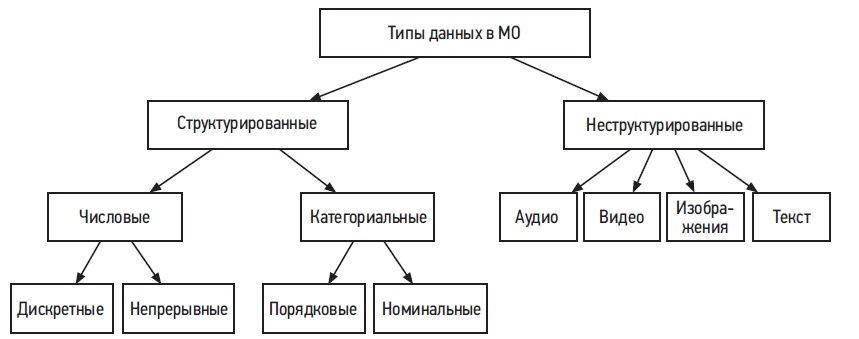

In [2]:
from IPython.display import Image
# Рисункок из книги Алекса Сюй
Image('L5_1.jpg', width=600, height=150 )

и еще Мультимодальные данные 

Хранение данных по типам

|Структурированные данные|Неструктурированные данные|
|-|-|
|Реляционные базы данных. Во многих базах данных NoSQL могут храниться структурированные данные. Хранилища данных|Базы данных NoSQL. Озера данных|

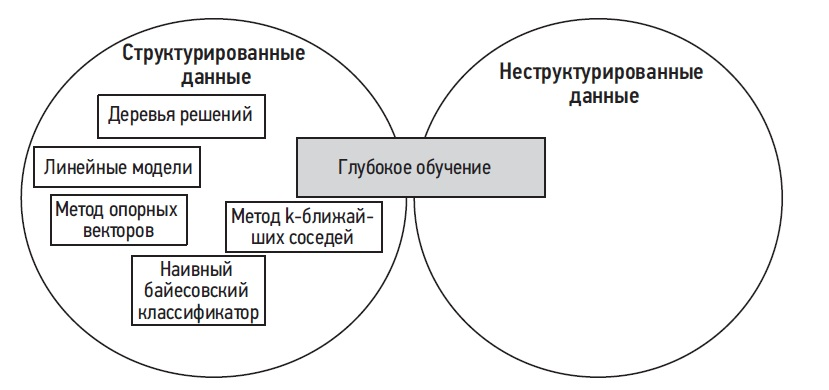

In [3]:
# Алгоритмы для разных типов данных

# Рисункок из книги Алекса Сюй
Image('L5_2.jpg', width=600, height=150 )

### Консистентность данных.

Уровни консистентности:

    Strong: все читают последние записанные данные
    
    Eventual: система достигает консистентности со временем
    
    Weak: нет гарантий о достижении консистентности
    
ACID свойства (для транзакционных систем):

    Atomicity: транзакция выполняется полностью, либо не выполняется вовсе
    
    Consistency: трензакция переводит систему из одного консистентного состояния в другое
    
    Isolation: параллельные транзакции не влияют друг на друга
    
    Durability: результаты транзакции сохраняются
    
BASE модель для распределенных систем:

    Basically AvailableL система доступна большую часть времени
    
    Soft state: состояние системы может изменяться со временем
    
    Eventual consistency: система достигнет консистентности

## Передачи данных

Поток данных между процессами - данные передаются из одного процесса в другой.

    Через базы данных - оба процесса пишут/читают одну БД
    
    Через сервисы - процессы обращаются к "маршрутизацию"

## Пакетная и потоковая обработка данных

Пакетная (batch) - заранее просчитываем какие-то данные, чтобы иметь к ним быстрый доступ. Потоковая - обработка в режиме реального времени.

## Конструирование признаков. 

К конструированию признаков относятся два процесса:

    использование знаний о предметной области, чтобы выбирать и извлекать предсказательные признаки из необработанных данных;

    преобразование предсказательных признаков в формат, пригодный для модели.

Deep Learning сам конструирует признаки, но мы еще далеки от ситуации, когда признаки конструируются сами.

Нередко выясняется, что некоторые из выбранных признаков представлены не в том формате, который может использовать модель. Операции конструирования признаков преобразуют их в подходящий формат. Среди таких операций: 1. обработка отсутствующих значений, 2. масштабирование значений со смещенным распределением, 3. кодирование категориальных признаков 4. утечки данных
   
**1. Обработка отсутствующих значений.**

        удаление
        
        заполнение константой/статистикой
        
Не существует универсального способа заполнения пропусков: бывают как случайные, так и неслучайные пропуски 

**2. Нормировка и масштабирование.**

    Нормализация (min-max масштабирование). Признаки масштабируются так, чтобы все значения принадлежали отрезку [0, 1]
    
    Стандартизация (нормализация z-оценки). Распределение признака изменяется так, чтобы его среднее значение было равно 0, а стандартное отклонение было равно 1.
    
    Логарифмическое масштабирование.
    
    Дискретизация — это преобразование непрерывного признака в категориальный. (вместо непрерывного возраста разбиваем признак на возрастные группы)

**3. Кодирование категориальных переменных**

    Целочисленное кодирование. Каждому уникальному категориальному значению ставится в соответствие целое число. Например, «Отлично» — 1, «Хорошо» — 2, «Плохо» — 3. Этот способ особенно полезен, если порядок целых значений соответствует естественному порядку категорий.
    
    Унитарное (one-hot) кодирование. Для каждого уникального значения создается новый бинарный признак.
    
    Эмбеддинги (embeddings). Другой способ кодирования категориальных признаков основан на обучении с эмбеддингами. Эмбеддинг (вложение) — это отображение категориального признака на N-мерный вектор.
    
    Пересечение признаков ("Дети и семейное положение") - помогает находить нелинейные зависимости.

**4. Утечки данных**

    Например, изображение легких с подозрением на ковид в разметке содержит надпись с кодом, в котором зашифровано наличие ковида.
    
Возможные причины утечки данных.

    Неправильное разбиение временных рядов. Правильно - брать разбиение на трейн тест по дате.
    
    Масштабирование/нормализация/заполнение пропусков перед разделением на трейн тест. Информация из теста попадает в трейн.
    
    Дубли в данных. При случайном выборе дубли могут попасть и в трейн и в тест. Групповая утечка - не полный дубль, а, например, близкое по времени изображение одного и того же места.
    
    Утечка из процесса генерации данных - например, когда снимки делаются на разных аппаратах, и модель учится определять аппарат

**Прочее**

    Feature extraction
    
    Feature transformation
    
    Feature selection

Слишком большое количество признаков может привести к утечкам данных и добавить лишней сложности модели.

Определение важности признаков (встроенные, shap) - позволяют отобрать признаки и обнаружить утечки.

Призкаки должны обладать обобщаемостью. Число лайков - плохой признак! Охват признака - число элементов в выборке, в которых он эффективен.

## Обучающие данные. 

### Семплирование (Выборка)

Невероятностная выборка

    Берем что есть (удобное семплирование)
    
    снежный ком (берем группу пользователей - добавляем их друзей и т д)
    
    экспертная 
    
    квотирование (берем в зависимости от какого-то категориального признака)
    
Простая случайная выборка

    Дисбаланс классов
    
Стратифицированная - разбиваем выборку на классы по какому-либо признаку и выбираем по определенной части от каждого класса.

Взвешенная - присваиваем элементам вес (шанс быть выбранным) 

Резервуарная - мы не можем загрузить весь датасет, значит, не знаем распределение. Загружаем первые k строк и с некоторой вероятностью заменяем один из них на вновь поступивший. Кажется, тут есть крутое теорверское обоснование.

По важности. Тоже круторй теорвер. Позволяет собирать данные из распределения, когда у нас есть доступ только к другому распределению. Если легко брать образцы из $Q(x)$ и трудно из $P(x)$, то можно назначить вес $P(x)/Q(x)$.

### Разметка

    Ручная разметка - дорогая, медленная, может нарушать конфиденциальность
    
        Может возникать несогласованность меток - когда разные разметчики ставят разные метки. Хорошая практика - хранить родословную данных: откуда пришли, кто и когда менял.
        
    Естественные метки - возникают в процессе эксплуатации системы (время в пути, рекомендации - ожидание vs реальность).
    
        Петля обратной связи - время от прогноза до получения обратной связи.
        
Работа с недостатком данных по разметке
    
    Эвристики (слабый контроль) - не используем разметку в явном виде, используем ключевые слова, результаты других моделей
    
    Частичный контроль - то же самое, но с применением исходной разметки
    
    Трансферное обучение - перенос результатов предыдущей модели на работу следующей.
    
    Активное обучение - выбираем только самые лучшие из размеченных данных.

### Аугментация данных

Простые преобразовани (сдвиги, повороты)

Возмущения

Синтез данных



## Пайплайн построения датасета

    Сбор необработанных данных
    
    Выявление признаков и меток
    
    Выбор стратегии формирования выборки
    
    Разбиение данных на обучающий, оценочный (валидационный) и тестовый
    
    Решение проблем несбалансированности классов

## Темы для обсуждения

    Доступность данных и их сбор. Из каких источников происходят данные? Какие данные доступны и как вы будете их собирать? Каков объем данных? Насколько часто появляются новые данные?

    Хранение данных. Где хранятся данные? Они находятся в облаке или на пользовательских устройствах? В каком формате лучше хранить данные? Как хранить комбинированные данные (например, точку данных, в которую могут входить и изображения, и текст)?
    
    Конструирование признаков. Как преобразовать сырые данные в форму, удобную для моделей? Что делать с отсутствующими данными? Нужно ли конструировать признаки для этой задачи? Какими операциями преобразовывать необработанные данные в формат, пригодный для модели МО? Нужно ли нормализовывать признаки? Какие признаки следует сформировать из необработанных данных? Как объединять данные разных типов (например, текст, числа и графику)?
    
    Конфиденциальность. Насколько конфиденциальны доступные данные? Заинтересованы ли пользователи в конфиденциальности своих данных? Нужно ли анонимизировать пользовательские данные? Можно ли хранить данные пользователей на серверах или к данным можно обращаться только на устройствах пользователей?

    Смещения. Наблюдаются ли смещения в данных? Если да, то какие именно и как их исправить?

#  Лекция 6. Работа с моделями. 


**Итеративный выбор модели:**

    Простые эвристики (минимальная затрата, быстрое получение обратной связи)
    
    Простые ML-модели (регрессии, деревья, наивный Байес, knn)
    
    Улучшение простых моделей (Feature Engineering, parameter tuning, ансамбли, больше данных-масштабирование)
    
    Complex models при необходимости (deep learning, gradient boosting)     
    
    Своя архитектура

**Выбор модели: лайфхаки**

    Ловушка State-of-the-art (оптимизированы для бенчмарков, а не реальных данных, часто переусложненные, ресурсоемкие)
    
    Все модели должны быть протестированы в равных условиях (одинаковое количество экспериментов, равные условия, автоматическое тестирование)
    
    Фокус на решении проблемы
    
    Масштабируемость, работа на перспективу
    
    Компромиссы (FP&FN, Accuracy&Latency, Accuracy&Interpretability, Performance&Cost)
    
    Понимание ограничений, допущений и специфики модели. сколько данных нужно для обучения модели; скорость обучения; какие выбрать гиперпараметры и методы их настройки; возможность непрерывного обучения; вычислительные требования. Более сложная модель может обеспечить более высокую точность, но также требует больше вычислительной мощности — например, графический процессор (GPU) вместо центрального (CPU); интерпретируемость модели. Производительность более сложной модели может быть выше, но, возможно, ее результаты будут хуже интерпретироваться.

**Обучение модели**

После того как модель выбрана, наступает время ее обучать. На этом шаге возникает ряд вопросов:
    
    выбор функции потерь: Изобрести новую функцию потерь непросто. На собеседовании по МО обычно ожидается, что вы выберете функцию потерь из списка существующих функций в соответствии с тем, как вы сформулировали проблему. Иногда приходится вносить в функцию потерь небольшие изменения, чтобы адаптировать ее для конкретной задачи
    
    Обучение с нуля или тонкая настройка (fine-tuning)

    Распределенное обучение. Важно, чтобы обучение можно было масштабировать, потому что со временем модели увеличиваются, и размер датасета тоже значительно возрастает. При распределенном обучении работа по обучению модели обычно распределяется между несколькими рабочими узлами, которые функционируют параллельно, чтобы ускорить обучение. Существует два основных типа распределенного обучения: параллелизм данных и параллелизм модели.
    
    AutoML


**Эксперименты и версионирование: лайфхаки**

Версионируем код, версионируем данные, версионируем окружение

Документируем эксперименты, автоматизируем версионирование, отмечаем успешные эксперименты

Отслеживаем

    Метрики модели
    
    Гиперпараметры
    
    Данные
    
    Системные метрики (время обучения, затрачиваемые ресурсы)
    
    Кривая потерь - метрика в зависимости от размера обучающей выборки
    
**Отладка моделей: лайфхаки**    

    Тихие ошибки (Test Loss падает, а prediction неправильные)
    
    Медленное исправление ошибки (переобучение сложной модели занимает дни)
    
    Кросс-функциональная запутанность (разные компоненты, разные команды начинают накладывать баги друг на друга)
    
Возможные причины проблем:

    Ограничения гипотезы (модель не подходит под задачу, или нарушены предположения)
    
    Проблемы разработки (ошибки в коде, забыли eval(), гиперпараметры неправильно подобрали)
    
    Проблемы с данными (неправильная разметка, неправильные статистики, неправильные признаки, утечки данных)
    
    

## Темы для обсуждения

Выбор модели. Какие модели МО подходят для задачи, каковы их достоинства и недостатки? Сколько времени необходимо для обучения? Сколько обучающих данных нужно для модели? Сколько вычислительных ресурсов может понадобиться для модели? Какова задержка обученной модели во время предсказаний? Можно ли развернуть модель на пользовательском устройстве? Интерпретируемость модели. Можно ли дообучать модель или обучение должно проводиться с нуля? Сколько параметров у модели? Сколько памяти ей требуется? Для нейронных сетей, возможно, придется обсудить типичные архитектуры и блоки — например, ResNet или архитектуры на базе Transformer. Также можно обсудить выбор гиперпараметров: количество скрытых слоев, количество нейронов, функции активации и т. д.

Метки набора данных. Откуда возьмутся метки? Есть ли уже у данных аннотации, и если да, то насколько они хороши? Если доступны естественные метки, то как их получить и сколько времени для этого потребуется? Как получить обратную связь от пользователей?

Непрерывное обучение. Нужно ли дообучать модель с каждой новой точкой данных? Следует ли персонализировать модель для каждого пользователя? Как часто будет дообучаться модель? Одни модели нужно дообучать ежедневно или еженедельно, а другие — раз в месяц или в год.

# Оценка (мониторинг)

## Целевые функции.

Целевые функции, метрики, функции потерь - вещи тесно связанные. 

Метрики — оценивают качество итоговой модели на тестовых данных (после обучения).
Пример: точность, F1-score, ROC-AUC.

Целевая функция — максимизируется алгоритмом в процессе обучения (задача оптимизации).
Пример: правдоподобие, прибыль.

Функция потерь (Loss function) — минимизируется алгоритмом на каждом шаге обучения.
Пример: MSE, кросс-энтропия.

https://education.yandex.ru/handbook/ml/article/mashinnoye-obucheniye

    Самый верхний уровень – это бизнес-метрики, например, будущий доход сервиса. Их трудно измерить в моменте, они сложным образом зависят от совокупности всех наших усилий, не только связанных с машинным обучением.

    Онлайн (online) метрики – это характеристики работающей системы, с помощью которых мы надеемся оценить, что будет с бизнес-метриками. Например, это может быть:
    – Медианная длина сессии в онлайн-игре. Можно предположить, что пользователь, который долго сидит в игре – это довольный пользователь.
    – Среднее количество бананов на полках во всех магазинах торговой сети в конце дня.

    Не всегда плоды наших трудов оцениваются числами. Многое может зависеть от субъективного восприятия людей, и для того, чтобы оценить их реакцию до выпуска в продакшен, применяется оценка специально нанятыми людьми – асессорами. Например, так можно оценивать, получилось ли у нас улучшить качество машинного перевода или релевантность выдачи в поисковой системе.

    Офлайн (offline) метрики могут быть измерены до введения модели в эксплуатацию, например, по историческим данным. В задачах, в которых нужно предсказывать какой-то конкретный таргет, офлайн метрики обычно оценивают отклонение предсказаний модели от истинных значений таргета. Например, это может быть точность предсказания, то есть число верно угаданных значений, или среднеквадратичное отклонение.

Правильный выбор метрик - тонкое (и хорошо оплачиваемое) искусство.

Лайфхак: если в ML-системе присутствует несколько ML-моделей, то их лоссы можно объединить в один суммированием.


Автономная (offline) оценка. Это оценка производительности моделей МО на этапе их разработки. Чтобы оценить модель, мы обычно сначала делаем предсказания на валидационном наборе данных, а затем с помощью различных формальных метрик выясняем, насколько эти предсказания близки к эталонным. 

Базовые конфигурации (что нужно попробовать, чтобы посмотреть, как работают метрики)

    Случайная модель
    
    Простые эвристики/правило нуля (самый популярный класс)
    
    Ответ эксперта
    
Валидация метрик

    Тест на возмущения
    
    Тест на ожидаемые изменения
    
    Калибровка (проверка соответствия прогнозов и реальных в частотно-вероятностном смысле)
    
    Оценка достоверности (проверка соответствия прогнозов и реальных в категориальном смысле)
    
    Оценка на основе срезов - проверка работы модели на подвыборках
    
        Парадокс Симпсона - эффект, проявляющийся на подвыборках, пропадает на всей совокупности данных (в Калифорнийском университете в 1973 году уровень приема аспирантов-мужчин был выше, чем у женщин, но в 4 из 6 кафедр было подавляющее число аспиранток - несправедливости нет)

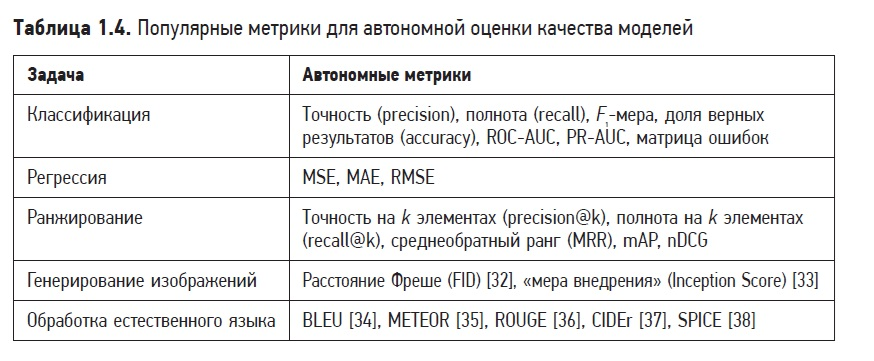

In [4]:
# Рисункок из книги Алекса Сюй
Image('L6_1.jpg', width=600, height=150 )

Оперативная (online) оценка
Это оценка качества моделей на этапе эксплуатации после развертывания. Метрики, которые применяются для оперативной оценки, обычно связаны с бизнес-целями. В отличие от автономных метрик, оперативные метрики часто выбираются субъективно в зависимости от вˆидения владельцев продукта и ключевых участников со стороны бизнеса.
На этом шаге эксперт оценивает ваше деловое чутье и хочет получить представление о том, как вы размышляете и почему выбираете те или иные метрики

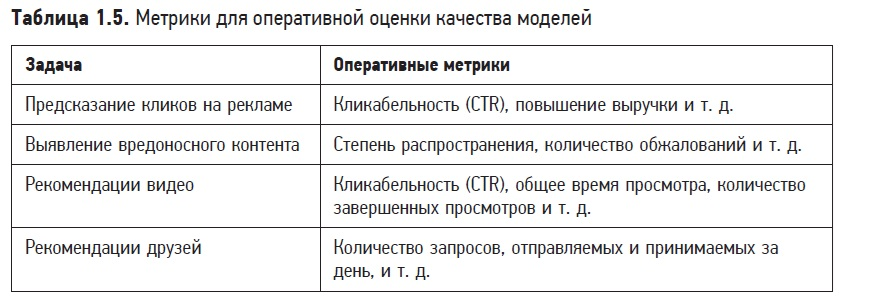

In [6]:
# Рисункок из книги Алекса Сюй
Image('L6_2.jpg', width=600, height=150 )

## Сбои в ML-системах

сбои компьютерной системы

    упала база, неправильно развернули, полетела видюха, сервер не работает

сбои ML-системы

    Данные в производстве отличаются от данных в разработке
    
    Граничные случаи - экстремальные наборы данных, на которых модель делает чудовищные ошибки
    
    Вырожденные петли обратной связи - прогноз вляет на обратную связь, она влияет на следующую итерацию модели и т д (пользователь выбирает чаще песни, которые показываются первыми; в какой-то момент в компанию взяли слишком много людей из ВШЭ - с тех пор модель рекомендует для найма только людей из вшэ). Решение в рексисах - следить за разнообразием рекомендаций, рандомизации. 
    
    Сдвиги в распределении данных 
    
### Сдвиги в распределении данных

$$P(X, Y) = P(X)P(Y|X) = P(Y)P(X|Y)$$
    
ковариационный сдвиг P(X) меняется P(Y|X) - прежнее
        
    Модель из общей поликлиники начали применять в студенческой
        
сдвиг меток P(Y) меняется, P(X|Y) - прежнее
        
    Применение препарата уменьшает вероятность болезни в любом возрасте P(X|Y) прежнее распределение болезни по возрастам разное
        
концептуальный дрейф P(Y|X) меняется, P(X) прежнее
        
    после начала эпидемии квартиры остались теми же, спрос упал
            
иные сдвиги в распределениях
        
    изменение признаков - появились новые признаки/старые потеряли актуальность
            
    изменение схемы - появились новые категории ответов
    
### Обнаружение сдвигов в распределении данных    

Статистические методы: статистики, проверка гипотез

Обработка выхода модели как временного ряда: скользящие и кумулятивные статистики

### Устранение сдвигов в распределении данных

Универсальные модели, большие данные - изучаем много закономерностей

Дообучение модели

Хитрые трюки

